### Combining the review files

In [2]:
master_df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        master_df = master_df.append(pd.read_csv(file))
        
master_df.to_csv('Master File.csv', index=False)

In [3]:
master_df.head()

""


### Exploratory Data Analysis

In [92]:
# Reading the master file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
df = pd.read_csv("C:/Users/suppande/Desktop/ISB/Course_Content/Capstone/combinedReviews.csv")

In [93]:
df.shape

(97097, 16)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97097 entries, 0 to 97096
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   skillDevelopment  97006 non-null  float64
 1   reviewText        43222 non-null  object 
 2   location          66513 non-null  object 
 3   cons              85931 non-null  object 
 4   salaryBenefits    96451 non-null  float64
 5   workLifeBalance   97008 non-null  float64
 6   pros              90430 non-null  object 
 7   workSatisfaction  96454 non-null  float64
 8   postedon          97096 non-null  object 
 9   jobSecurity       96464 non-null  float64
 10  careerGrowth      96446 non-null  float64
 11  companyCulture    96473 non-null  float64
 12  company           97096 non-null  object 
 13  jobFunction       96897 non-null  object 
 14  overallScore      97097 non-null  float64
 15  file              97097 non-null  object 
dtypes: float64(8), object(8)
memory usage: 1

In [95]:
# Checking null values
df.isnull().sum()

skillDevelopment       91
reviewText          53875
location            30584
cons                11166
salaryBenefits        646
workLifeBalance        89
pros                 6667
workSatisfaction      643
postedon                1
jobSecurity           633
careerGrowth          651
companyCulture        624
company                 1
jobFunction           200
overallScore            0
file                    0
dtype: int64

#### We notice 55% of data missing under the column - ReviewText. However, the 'Pros' and 'Cons' columns have only ~ 7% and 11% data missing

In [96]:
# Extracting the desired variables for analysis
reviews = df[['company','overallScore','reviewText','cons','pros']]

In [97]:
reviews.shape

(97097, 5)

In [98]:
reviews.head()

,company,overallScore,reviewText,cons,pros
0,HCL Technologies,1.0,Its good and managable only because of team.,Fake offers were given while recruiting. Wrong...,Only my collegues and work culture. There is n...
1,HCL Technologies,4.0,Very balanced and rarely pressuring.,* Although it's WFH as of now but no general t...,Overall good experience for me! Very much secu...
2,HCL Technologies,3.0,working hours are 9:30 hours no shift allowanc...,Management always listen what the manager sayi...,Job security is there Client or Customer centr...
3,HCL Technologies,1.0,Too bad for a mid level experienced. Enquire p...,Work culture is too bad and experienced so man...,It is a growing organization and has multiple ...
4,HCL Technologies,1.0,Is there anything called work life balance her...,Why not paying your employees good!? .Stop ove...,"Hcl is avery good organization,But the middle ..."


In [101]:
reviews.groupby('company').size()

company
HCL Technologies    17891
Infosys             21639
TCS                 36475
Wipro               21091
dtype: int64

C:\Users\suppande\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of Reviews per Company')

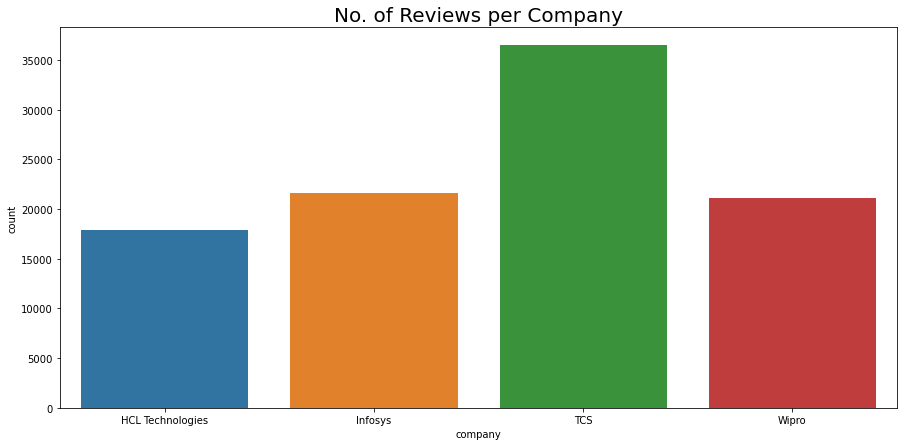

In [102]:
# of reviews per company

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(reviews['company'])
plt.title('No. of Reviews per Company', fontsize = 20)

In [103]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97097 entries, 0 to 97096
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       97096 non-null  object 
 1   overallScore  97097 non-null  float64
 2   reviewText    43222 non-null  object 
 3   cons          85931 non-null  object 
 4   pros          90430 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.7+ MB


In [104]:
reviews['reviewText'].isnull().sum(axis = 0)

53875

In [105]:
reviews = reviews.dropna(subset=['reviewText'])
reviews.shape

(43222, 5)

In [108]:
reviews.head(-10)

,company,overallScore,reviewText,cons,pros
0,HCL Technologies,1.0,Its good and managable only because of team.,Fake offers were given while recruiting. Wrong...,Only my collegues and work culture. There is n...
1,HCL Technologies,4.0,Very balanced and rarely pressuring.,* Although it's WFH as of now but no general t...,Overall good experience for me! Very much secu...
2,HCL Technologies,3.0,working hours are 9:30 hours no shift allowanc...,Management always listen what the manager sayi...,Job security is there Client or Customer centr...
3,HCL Technologies,1.0,Too bad for a mid level experienced. Enquire p...,Work culture is too bad and experienced so man...,It is a growing organization and has multiple ...
4,HCL Technologies,1.0,Is there anything called work life balance her...,Why not paying your employees good!? .Stop ove...,"Hcl is avery good organization,But the middle ..."
...,...,...,...,...,...
97077,Wipro,3.0,Not that bad.,The salary packages or the pay scale offered t...,The work culture was great under reporting man...
97078,Wipro,5.0,Overall is Good.,Putting work pressure from project management....,Wipro is a good company and the company enviro...
97079,Wipro,4.0,Nice one.,The company management and policies are good b...,"Good work experience and our team. Teammates, ..."
97080,Wipro,4.0,With the wrong managers on board and not able ...,I wanted to stay in the organisation and grow ...,I love the fact of it being employee centric


In [109]:
# Converting the textual data into string
reviews[['reviewText', 'cons', 'pros']] = reviews.loc[:, ['reviewText', 'cons', 'pros']]. astype(str)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43222 entries, 0 to 97095
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       43222 non-null  object 
 1   overallScore  43222 non-null  float64
 2   reviewText    43222 non-null  object 
 3   cons          43222 non-null  object 
 4   pros          43222 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [110]:
reviews.shape

(43222, 5)

In [51]:
# Dropping the row with 'nan' values
#reviews = nan_in_col.dropna(axis = 0, how = 'any', inplace = True)
#reviews.shape

<ipython-input-51-8db9c7f02689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews = nan_in_col.dropna(axis = 0, how = 'any', inplace = True)


AttributeError: 'NoneType' object has no attribute 'shape'

In [111]:
# Tokenization
reviews['tokenized_reviews'] = reviews['reviewText'].apply(word_tokenize)
reviews['tokenized_cons'] = reviews['cons'].apply(word_tokenize)
reviews['tokenized_pros'] = reviews['pros'].apply(word_tokenize)

In [112]:
# Converting to Lowercase
reviews['lower_reviews'] = reviews['tokenized_reviews'].apply(lambda x: [word.lower() for word in x])
reviews['lower_cons'] = reviews['tokenized_cons'].apply(lambda x: [word.lower() for word in x])
reviews['lower_pros'] = reviews['tokenized_pros'].apply(lambda x: [word.lower() for word in x])

In [113]:
# Removing Punctuations
import string 
punc = string.punctuation

reviews['nopunct_reviews'] = reviews['lower_reviews'].apply(lambda x: [word for word in x if word not in punc])
reviews['nopunct_cons'] = reviews['lower_cons'].apply(lambda x: [word for word in x if word not in punc])
reviews['nopunct_pros'] = reviews['lower_pros'].apply(lambda x: [word for word in x if word not in punc])

In [114]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suppande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
# Removal of Stopwords
stop_words = nltk.corpus.stopwords.words('english')
new_stopwords = ["tcs","infosys","hcl","wipro", "nan"]
stop_words.extend(new_stopwords)

In [116]:
reviews['reviewText_clean'] = reviews['nopunct_reviews'].apply(lambda x: [word for word in x if word not in stop_words])
reviews['cons_clean'] = reviews['nopunct_cons'].apply(lambda x: [word for word in x if word not in stop_words])
reviews['pros_clean'] = reviews['nopunct_pros'].apply(lambda x: [word for word in x if word not in stop_words])

reviews['reviewText_str'] = [' '.join(map(str,l)) for l in reviews['reviewText_clean']]
reviews['cons_str'] = [' '.join(map(str,l)) for l in reviews['cons_clean']]
reviews['pros_str'] = [' '.join(map(str,l)) for l in reviews['pros_clean']]

reviews.head()

,company,overallScore,reviewText,cons,pros,tokenized_reviews,tokenized_cons,tokenized_pros,lower_reviews,lower_cons,lower_pros,nopunct_reviews,nopunct_cons,nopunct_pros,reviewText_clean,cons_clean,pros_clean,reviewText_str,cons_str,pros_str
0,HCL Technologies,1.0,Its good and managable only because of team.,Fake offers were given while recruiting. Wrong...,Only my collegues and work culture. There is n...,"[Its, good, and, managable, only, because, of,...","[Fake, offers, were, given, while, recruiting,...","[Only, my, collegues, and, work, culture, ., T...","[its, good, and, managable, only, because, of,...","[fake, offers, were, given, while, recruiting,...","[only, my, collegues, and, work, culture, ., t...","[its, good, and, managable, only, because, of,...","[fake, offers, were, given, while, recruiting,...","[only, my, collegues, and, work, culture, ther...","[good, managable, team]","[fake, offers, given, recruiting, wrong, infor...","[collegues, work, culture, option, rate, 1, co...",good managable team,fake offers given recruiting wrong information...,collegues work culture option rate 1 compensat...
1,HCL Technologies,4.0,Very balanced and rarely pressuring.,* Although it's WFH as of now but no general t...,Overall good experience for me! Very much secu...,"[Very, balanced, and, rarely, pressuring, .]","[*, Although, it, 's, WFH, as, of, now, but, n...","[Overall, good, experience, for, me, !, Very, ...","[very, balanced, and, rarely, pressuring, .]","[*, although, it, 's, wfh, as, of, now, but, n...","[overall, good, experience, for, me, !, very, ...","[very, balanced, and, rarely, pressuring]","[although, it, 's, wfh, as, of, now, but, no, ...","[overall, good, experience, for, me, very, muc...","[balanced, rarely, pressuring]","[although, 's, wfh, general, transportation, a...","[overall, good, experience, much, secured, ter...",balanced rarely pressuring,although 's wfh general transportation availab...,overall good experience much secured terms job...
2,HCL Technologies,3.0,working hours are 9:30 hours no shift allowanc...,Management always listen what the manager sayi...,Job security is there Client or Customer centr...,"[working, hours, are, 9:30, hours, no, shift, ...","[Management, always, listen, what, the, manage...","[Job, security, is, there, Client, or, Custome...","[working, hours, are, 9:30, hours, no, shift, ...","[management, always, listen, what, the, manage...","[job, security, is, there, client, or, custome...","[working, hours, are, 9:30, hours, no, shift, ...","[management, always, listen, what, the, manage...","[job, security, is, there, client, or, custome...","[working, hours, 9:30, hours, shift, allowance...","[management, always, listen, manager, saying, ...","[job, security, client, customer, centric, com...",working hours 9:30 hours shift allowances shif...,management always listen manager saying one li...,job security client customer centric company m...
3,HCL Technologies,1.0,Too bad for a mid level experienced. Enquire p...,Work culture is too bad and experienced so man...,It is a growing organization and has multiple ...,"[Too, bad, for, a, mid, level, experienced, .,...","[Work, culture, is, too, bad, and, experienced...","[It, is, a, growing, organization, and, has, m...","[too, bad, for, a, mid, level, experienced, .,...","[work, culture, is, too, bad, and, experienced...","[it, is, a, growing, organization, and, has, m...","[too, bad, for, a, mid, level, experienced, en...","[work, culture, is, too, bad, and, experienced...","[it, is, a, growing, organization, and, has, m...","[bad, mid, level, experienced, enquire, proper...","[work, culture, bad, experienced, many, mind, ...","[growing, organization, multiple, mechanical, ...",bad mid level experienced enquire properly joi...,work culture bad experienced many mind games p...,growing organization multiple mechanical engin...
4,HCL Technologies,1.0,Is there anything called work life balance her...,Why not paying your employees go

### Generating Word Cloud

In [118]:
from wordcloud import WordCloud, STOPWORDS
def plot_wordcloud(docx):
    mywordcloud = WordCloud(width=1600, height=800, background_color='white',max_words=100).generate(docx)
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Top 100 Words', fontsize=100)
    plt.show()

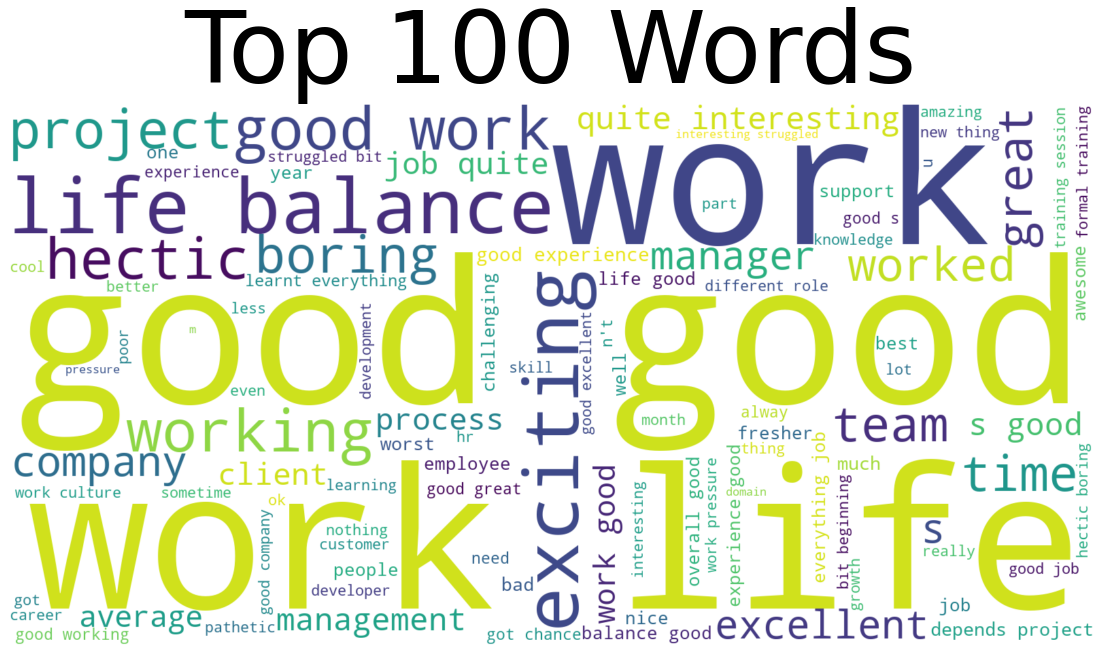

In [119]:
all_docx = ' '.join(reviews['reviewText_str'])
plot_wordcloud(all_docx)

(-0.5, 1199.5, 1199.5, -0.5)

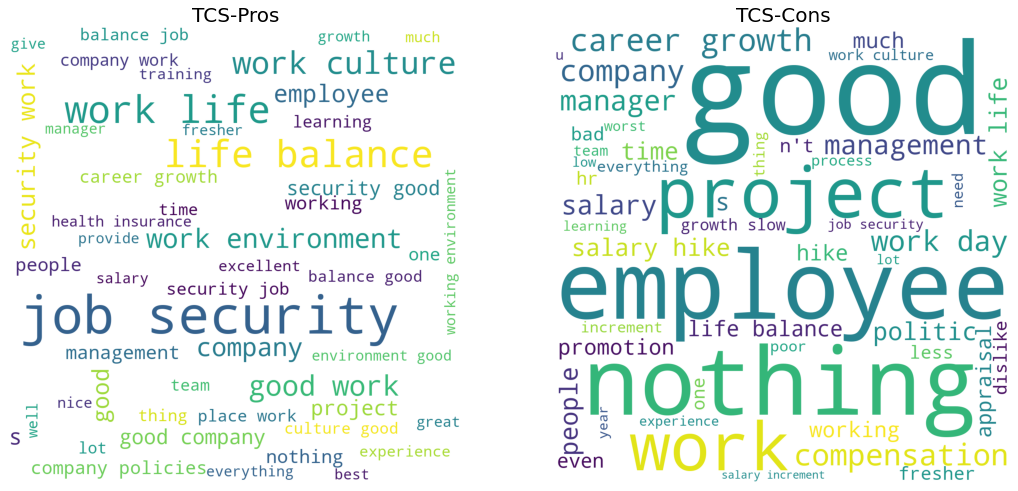

In [75]:
# TCS' summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'TCS']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('TCS-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'TCS']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('TCS-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')


(-0.5, 1199.5, 1199.5, -0.5)

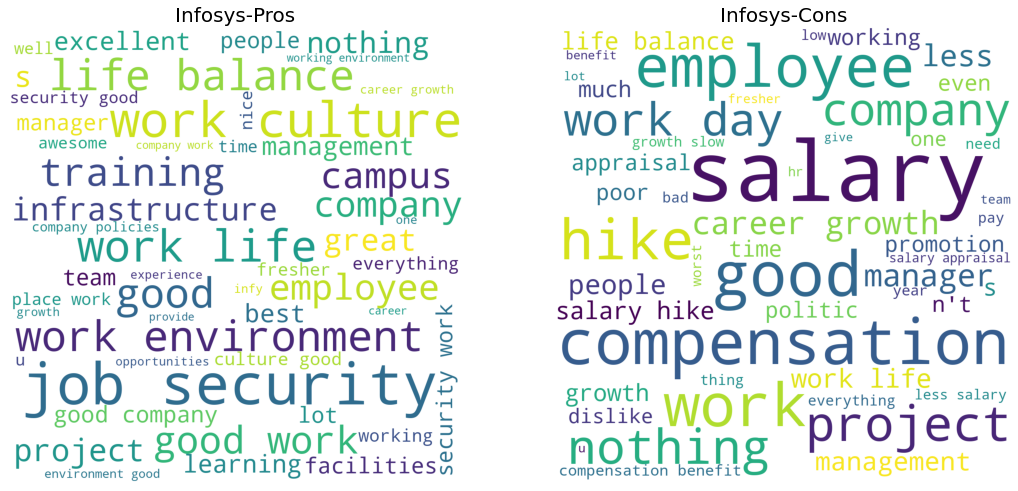

In [76]:
# Infosys' summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'Infosys']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Infosys-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'Infosys']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Infosys-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

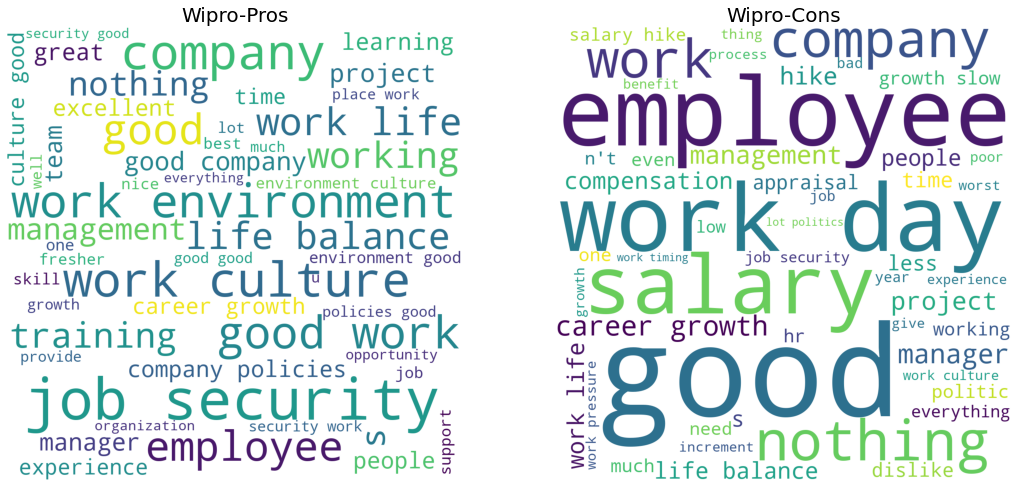

In [77]:
# Wipro summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'Wipro']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Wipro-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'Wipro']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Wipro-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

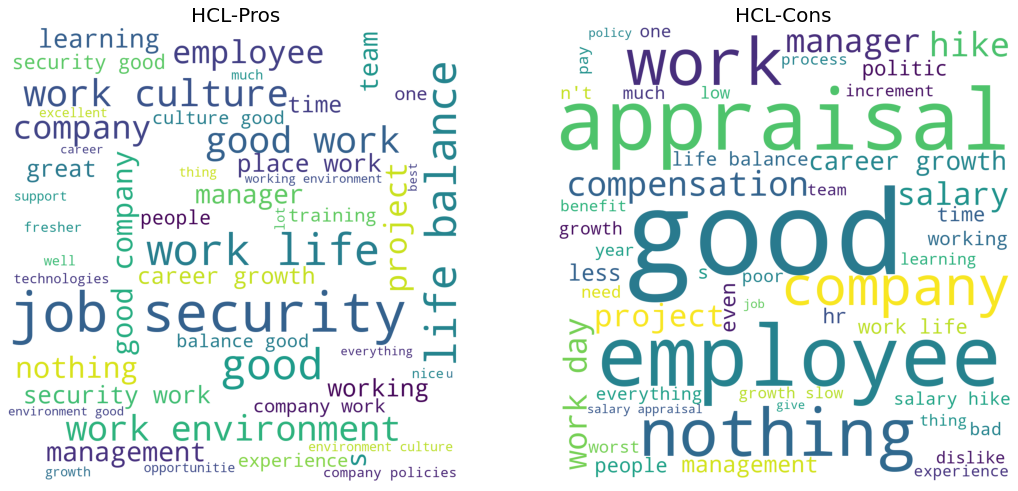

In [78]:
# HCL Technologies' summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'HCL Technologies']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('HCL-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'HCL Technologies']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('HCL-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

In [79]:
reviews.to_csv('reviews_clean.csv')

In [120]:
# Extracting the desired variables for analysis
clean = reviews.loc[:, ['company','overallScore','reviewText_clean']]

In [122]:
# Lemmatization
clean['pos_tags'] = clean['reviewText_clean'].apply(nltk.tag.pos_tag)
clean.head(-10)

,company,overallScore,reviewText_clean,pos_tags
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]"
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, V..."
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowance...","[(working, VBG), (hours, NNS), (9:30, CD), (ho..."
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, proper...","[(bad, JJ), (mid, NNS), (level, NN), (experien..."
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., co...","[(anything, NN), (called, VBN), (work, NN), (l..."
...,...,...,...,...
97077,Wipro,3.0,[bad],"[(bad, JJ)]"
97078,Wipro,5.0,"[overall, good]","[(overall, JJ), (good, JJ)]"
97079,Wipro,4.0,"[nice, one]","[(nice, JJ), (one, CD)]"
97080,Wipro,4.0,"[wrong, managers, board, able, handle, clients...","[(wrong, JJ), (managers, NNS), (board, NN), (a..."


In [123]:
from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
clean['wordnet_pos'] = clean['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]"
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, V...","[(balanced, v), (rarely, r), (pressuring, v)]"
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowance...","[(working, VBG), (hours, NNS), (9:30, CD), (ho...","[(working, v), (hours, n), (9:30, n), (hours, ..."
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, proper...","[(bad, JJ), (mid, NNS), (level, NN), (experien...","[(bad, a), (mid, n), (level, n), (experienced,..."
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., co...","[(anything, NN), (called, VBN), (work, NN), (l...","[(anything, n), (called, v), (work, n), (life,..."


In [124]:
from nltk import *
wnl = WordNetLemmatizer()
clean['lemmatized'] = clean['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos,lemmatized
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]","[good, managable, team]"
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, V...","[(balanced, v), (rarely, r), (pressuring, v)]","[balance, rarely, pressure]"
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowance...","[(working, VBG), (hours, NNS), (9:30, CD), (ho...","[(working, v), (hours, n), (9:30, n), (hours, ...","[work, hour, 9:30, hour, shift, allowance, shi..."
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, proper...","[(bad, JJ), (mid, NNS), (level, NN), (experien...","[(bad, a), (mid, n), (level, n), (experienced,...","[bad, mid, level, experience, enquire, properl..."
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., co...","[(anything, NN), (called, VBN), (work, NN), (l...","[(anything, n), (called, v), (work, n), (life,...","[anything, call, work, life, balance, .., colu..."


In [125]:
# Importing Libraries
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [126]:
clean['lemma_str'] = [' '.join(map(str,l)) for l in clean['lemmatized']]
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos,lemmatized,lemma_str
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]","[good, managable, team]",good managable team
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, V...","[(balanced, v), (rarely, r), (pressuring, v)]","[balance, rarely, pressure]",balance rarely pressure
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowance...","[(working, VBG), (hours, NNS), (9:30, CD), (ho...","[(working, v), (hours, n), (9:30, n), (hours, ...","[work, hour, 9:30, hour, shift, allowance, shi...",work hour 9:30 hour shift allowance shift get ...
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, proper...","[(bad, JJ), (mid, NNS), (level, NN), (experien...","[(bad, a), (mid, n), (level, n), (experienced,...","[bad, mid, level, experience, enquire, properl...",bad mid level experience enquire properly join...
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., co...","[(anything, NN), (called, VBN), (work, NN), (l...","[(anything, n), (called, v), (work, n), (life,...","[anything, call, work, life, balance, .., colu...",anything call work life balance .. colum joke


### Sentiment Analysis using TextBlob

In [127]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity_blob':sentiment_polarity,
              'subjectivity_blob':sentiment_subjectivity,
              'sentiment_blob':sentiment_label}
    return result

In [128]:
clean['sentiment_results'] = clean['lemma_str'].apply(get_sentiment)

In [129]:
clean = clean.join(pd.json_normalize(clean['sentiment_results']))
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43222 entries, 0 to 97095
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            43222 non-null  object 
 1   overallScore       43222 non-null  float64
 2   reviewText_clean   43222 non-null  object 
 3   pos_tags           43222 non-null  object 
 4   wordnet_pos        43222 non-null  object 
 5   lemmatized         43222 non-null  object 
 6   lemma_str          43222 non-null  object 
 7   sentiment_results  43222 non-null  object 
 8   polarity_blob      18980 non-null  float64
 9   subjectivity_blob  18980 non-null  float64
 10  sentiment_blob     18980 non-null  object 
dtypes: float64(3), object(8)
memory usage: 5.0+ MB


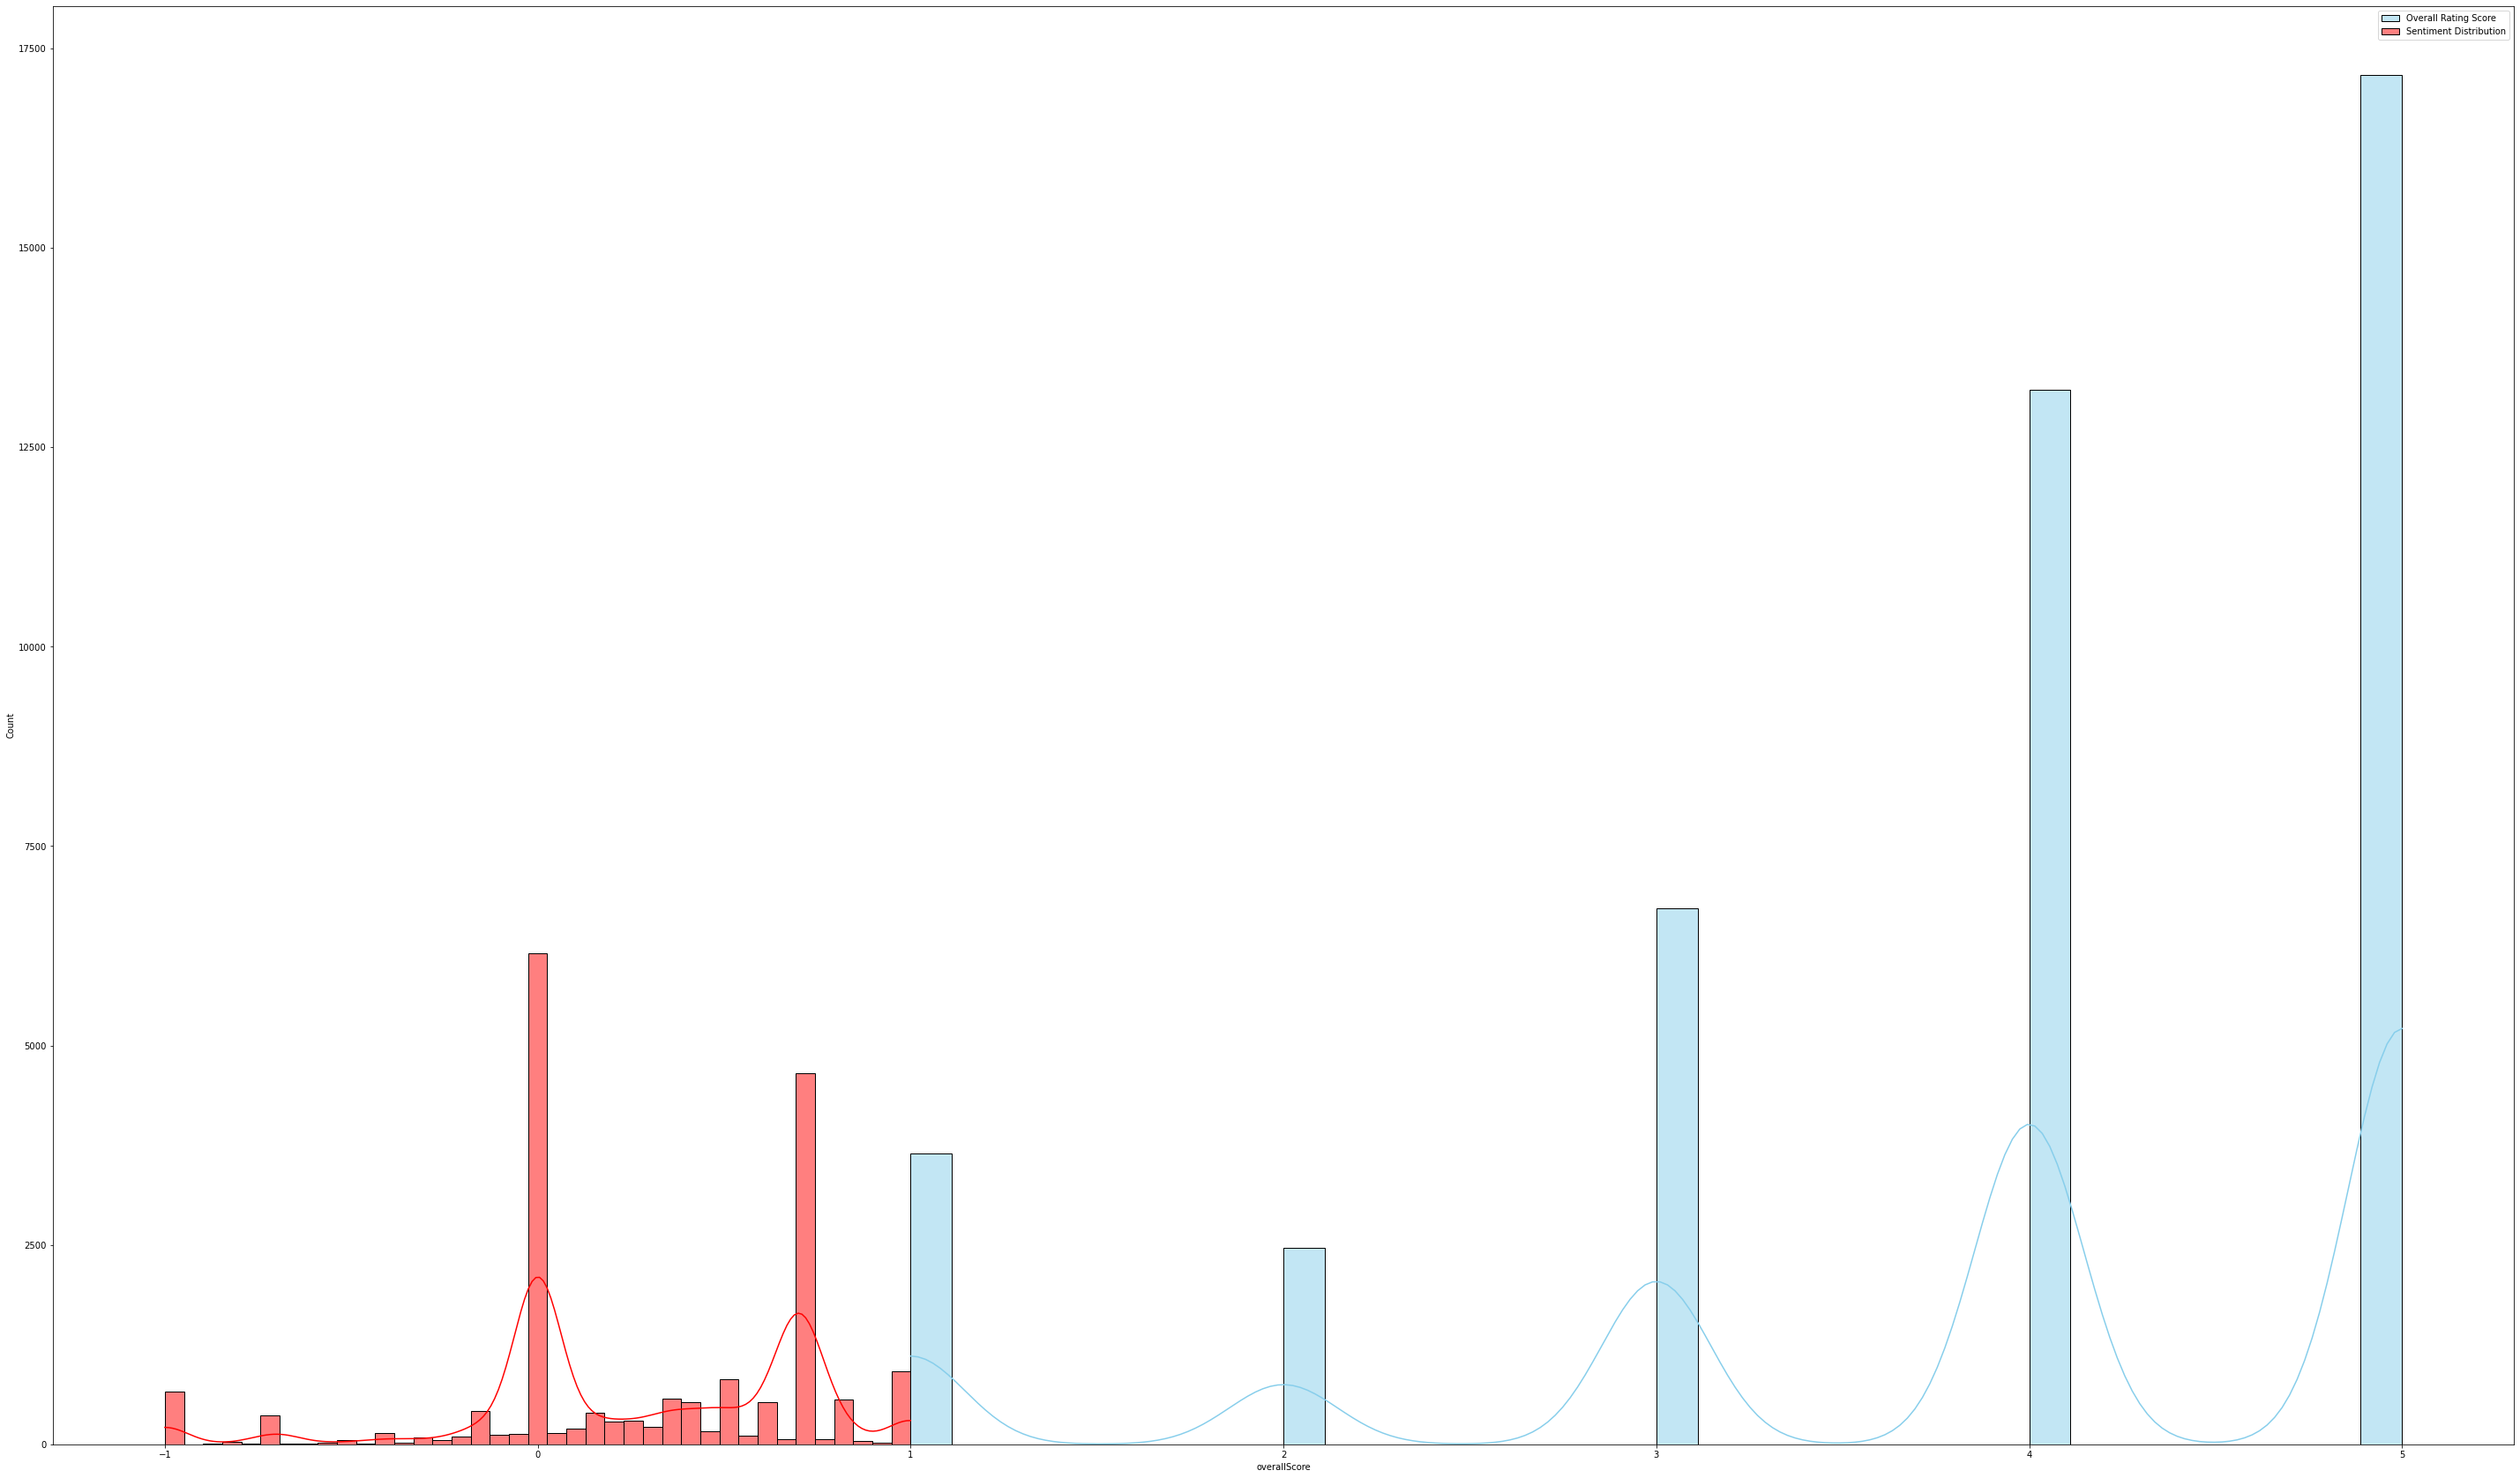

In [130]:
plt.figure(figsize=(50,30))
sns.histplot(data=clean, x="overallScore", color="skyblue", label="Overall Rating Score", kde=True)
sns.histplot(data=clean, x="polarity_blob", color="red", label="Sentiment Distribution", kde=True)

plt.legend() 
plt.show()

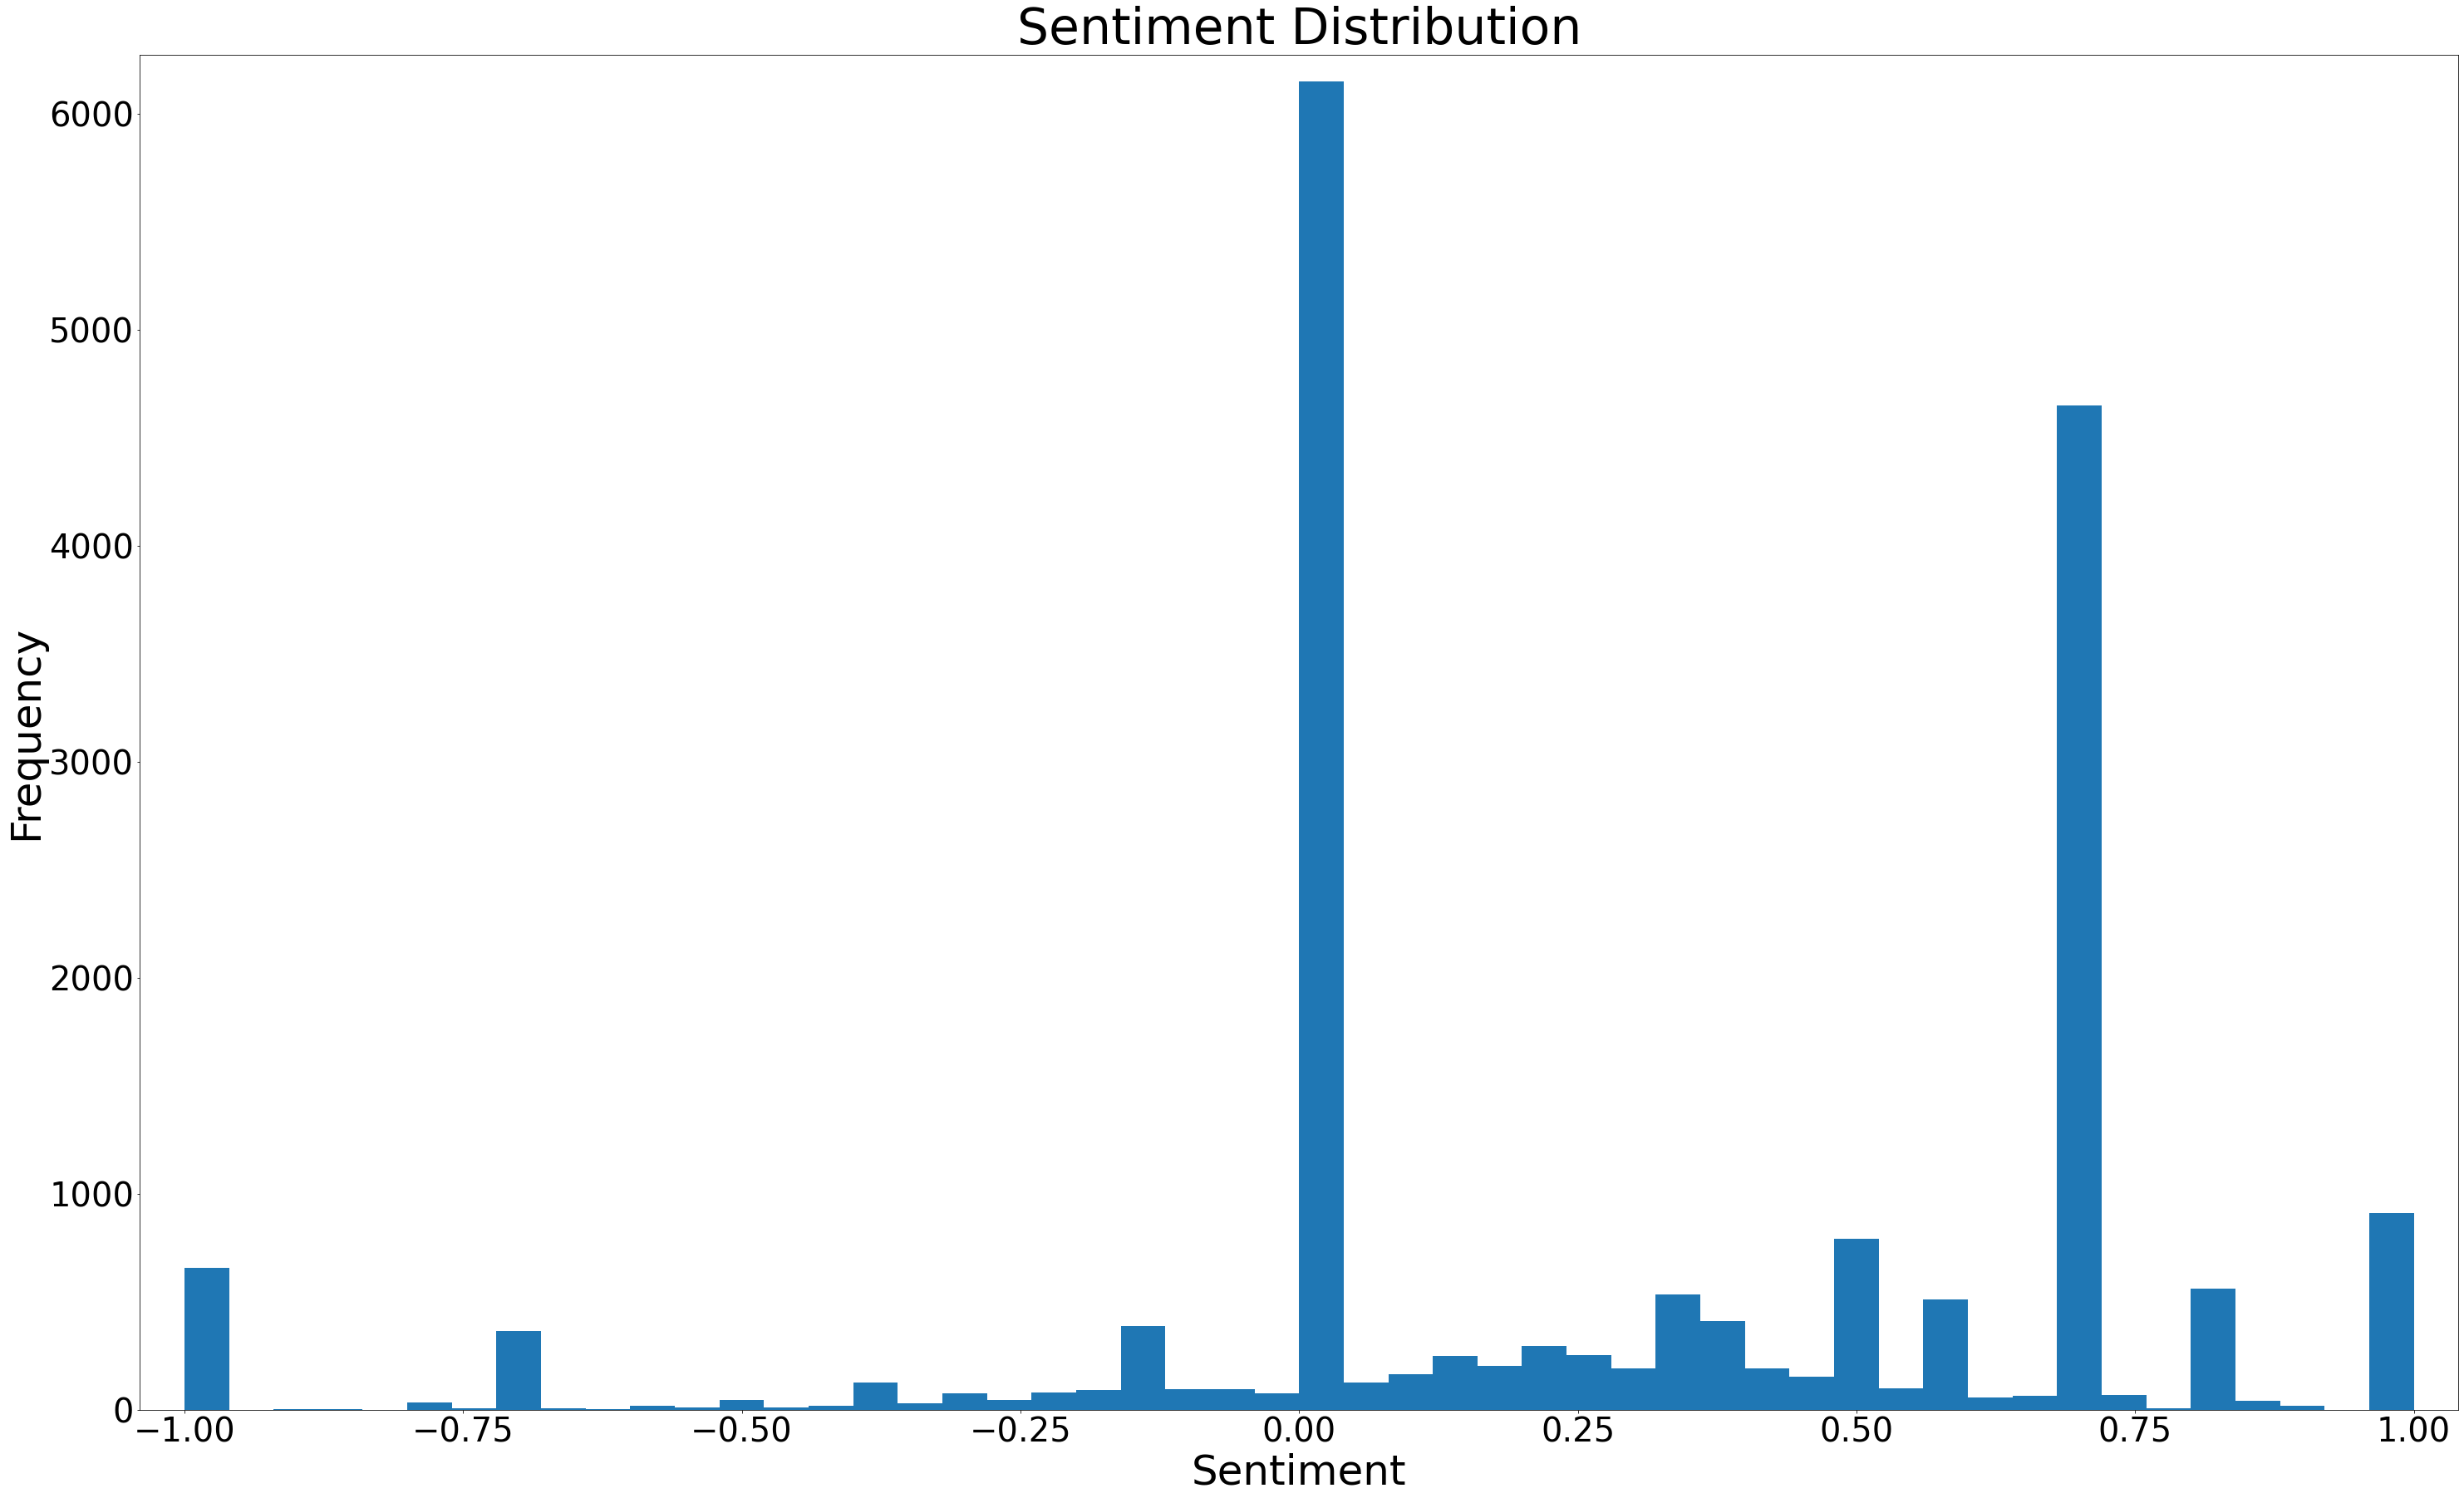

In [131]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(clean['polarity_blob'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

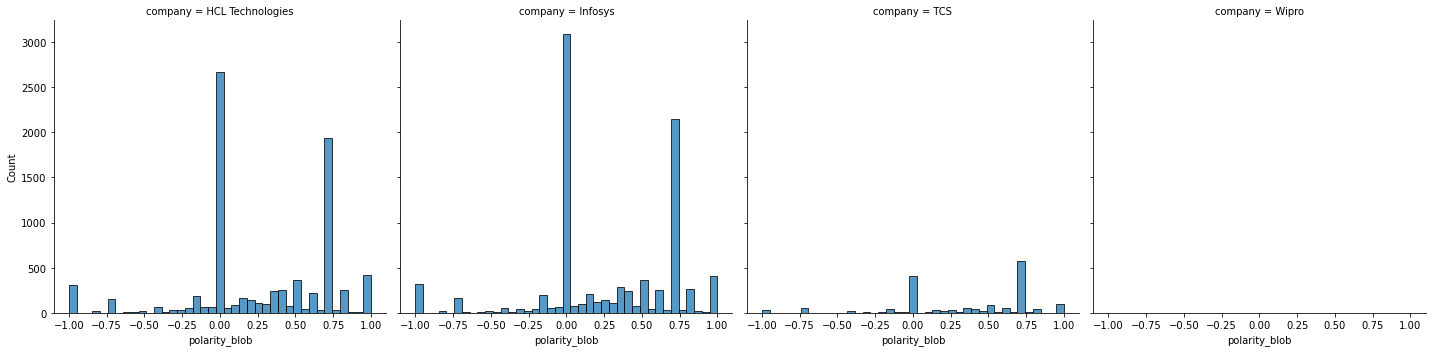

In [138]:
plt.rcParams['figure.figsize'] = (18, 10)

sns.displot(clean, x="polarity_blob", col="company")

C:\Users\suppande\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


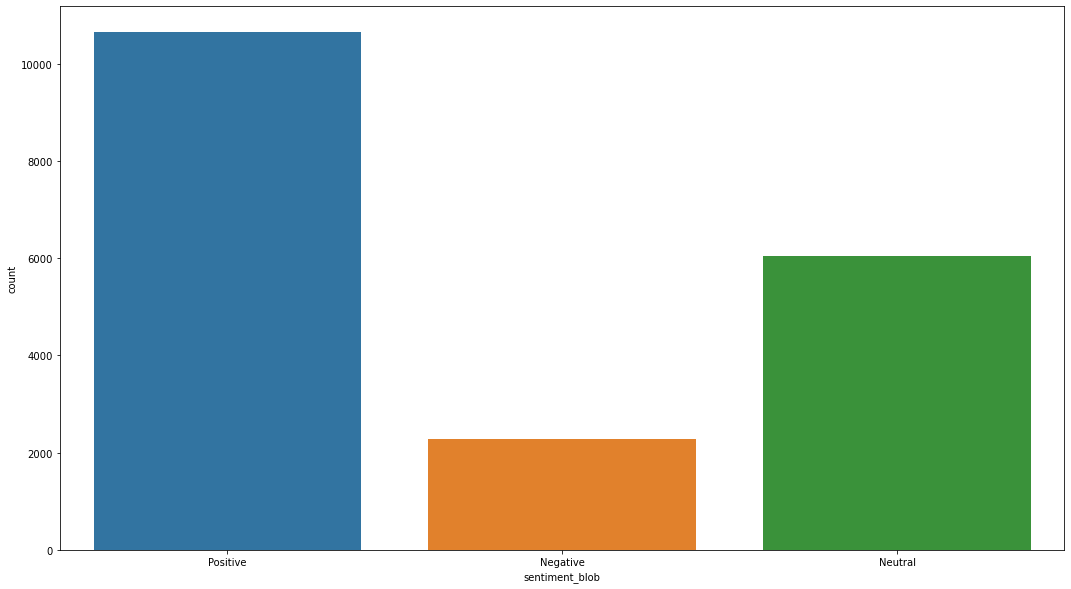

In [139]:
sns.countplot(clean['sentiment_blob'])

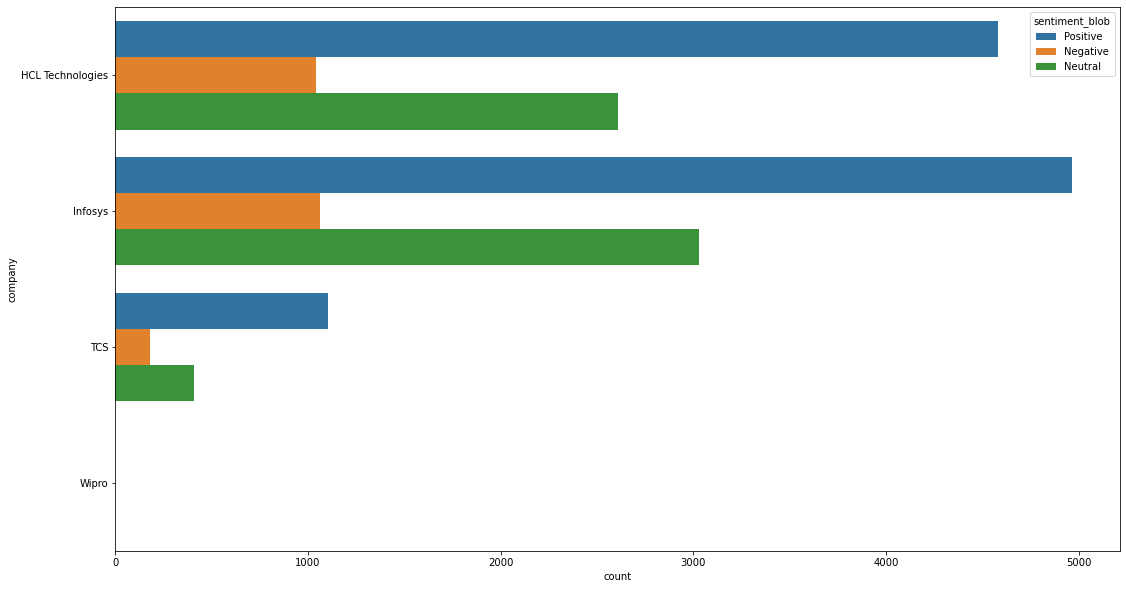

In [140]:
sns.countplot(y ='company', hue = 'sentiment_blob', data = clean)

### Sentiment Analysis using VADER

In [141]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\suppande\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [142]:
clean['scores_vader'] = clean['lemma_str'].apply(lambda lemma_str: sid.polarity_scores(lemma_str))
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment_results,polarity_blob,subjectivity_blob,sentiment_blob,scores_vader
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]","[good, managable, team]",good managable team,"{'polarity_blob': 0.7, 'subjectivity_blob': 0....",0.7000,0.600000,Positive,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp..."
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, V...","[(balanced, v), (rarely, r), (pressuring, v)]","[balance, rarely, pressure]",balance rarely pressure,"{'polarity_blob': 0.3, 'subjectivity_blob': 0....",0.3000,0.900000,Positive,"{'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'comp..."
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowance...","[(working, VBG), (hours, NNS), (9:30, CD), (ho...","[(working, v), (hours, n), (9:30, n), (hours, ...","[work, hour, 9:30, hour, shift, allowance, shi...",work hour 9:30 hour shift allowance shift get ...,"{'polarity_blob': -0.24999999999999997, 'subje...",-0.2500,0.261111,Negative,"{'neg': 0.114, 'neu': 0.844, 'pos': 0.042, 'co..."
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, proper...","[(bad, JJ), (mid, NNS), (level, NN), (experien...","[(bad, a), (mid, n), (level, n), (experienced,...","[bad, mid, level, experience, enquire, properl...",bad mid level experience enquire properly join...,"{'polarity_blob': -0.11249999999999996, 'subje...",-0.1125,0.254167,Negative,"{'neg': 0.136, 'neu': 0.778, 'pos': 0.086, 'co..."
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., co...","[(anything, NN), (called, VBN), (work, NN), (l...","[(anything, n), (called, v), (work, n), (life,...","[anything, call, work, life, balance, .., colu...",anything call work life balance .. colum joke,"{'polarity_blob': 0.0, 'subjectivity_blob': 0....",0.0000,0.000000,Neutral,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp..."


In [143]:
clean['compound_vader'] = clean['scores_vader'].apply(lambda score_dict: score_dict['compound'])
clean['sentiment_vader']=''
clean.loc[clean.compound_vader>0,'sentiment_vader']='Positive'
clean.loc[clean.compound_vader==0,'sentiment_vader']='Neutral'
clean.loc[clean.compound_vader<0,'sentiment_vader']='Negative'

In [144]:
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment_results,polarity_blob,subjectivity_blob,sentiment_blob,scores_vader,compound_vader,sentiment_vader
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]","[good, managable, team]",good managable team,"{'polarity_blob': 0.7, 'subjectivity_blob': 0....",0.7000,0.600000,Positive,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Positive
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, V...","[(balanced, v), (rarely, r), (pressuring, v)]","[balance, rarely, pressure]",balance rarely pressure,"{'polarity_blob': 0.3, 'subjectivity_blob': 0....",0.3000,0.900000,Positive,"{'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'comp...",0.2235,Positive
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowance...","[(working, VBG), (hours, NNS), (9:30, CD), (ho...","[(working, v), (hours, n), (9:30, n), (hours, ...","[work, hour, 9:30, hour, shift, allowance, shi...",work hour 9:30 hour shift allowance shift get ...,"{'polarity_blob': -0.24999999999999997, 'subje...",-0.2500,0.261111,Negative,"{'neg': 0.114, 'neu': 0.844, 'pos': 0.042, 'co...",-0.4939,Negative
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, proper...","[(bad, JJ), (mid, NNS), (level, NN), (experien...","[(bad, a), (mid, n), (level, n), (experienced,...","[bad, mid, level, experience, enquire, properl...",bad mid level experience enquire properly join...,"{'polarity_blob': -0.11249999999999996, 'subje...",-0.1125,0.254167,Negative,"{'neg': 0.136, 'neu': 0.778, 'pos': 0.086, 'co...",-0.3182,Negative
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., co...","[(anything, NN), (called, VBN), (work, NN), (l...","[(anything, n), (called, v), (work, n), (life,...","[anything, call, work, life, balance, .., colu...",anything call work life balance .. colum joke,"{'polarity_blob': 0.0, 'subjectivity_blob': 0....",0.0000,0.000000,Neutral,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...",0.2960,Positive


C:\Users\suppande\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


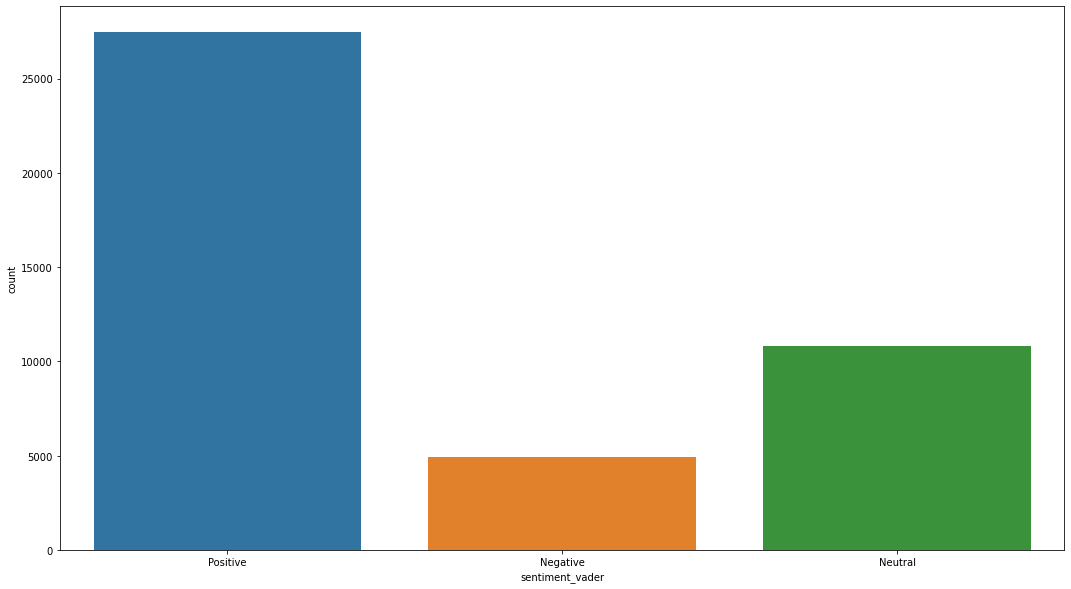

In [145]:
sns.countplot(clean['sentiment_vader'])

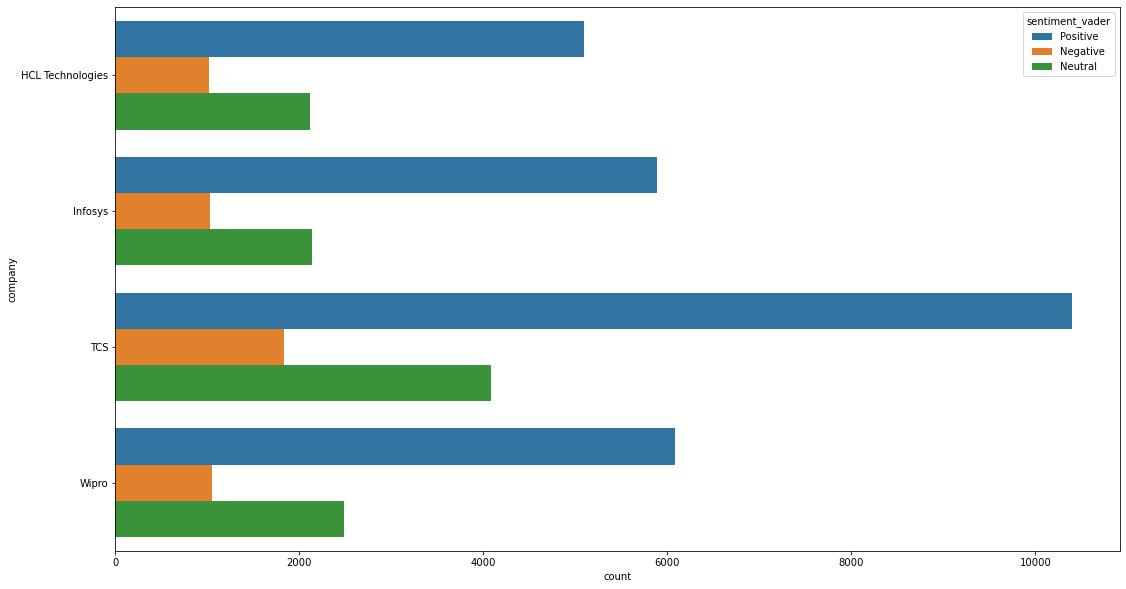

In [146]:
sns.countplot(y ='company', hue = 'sentiment_vader', data = clean)

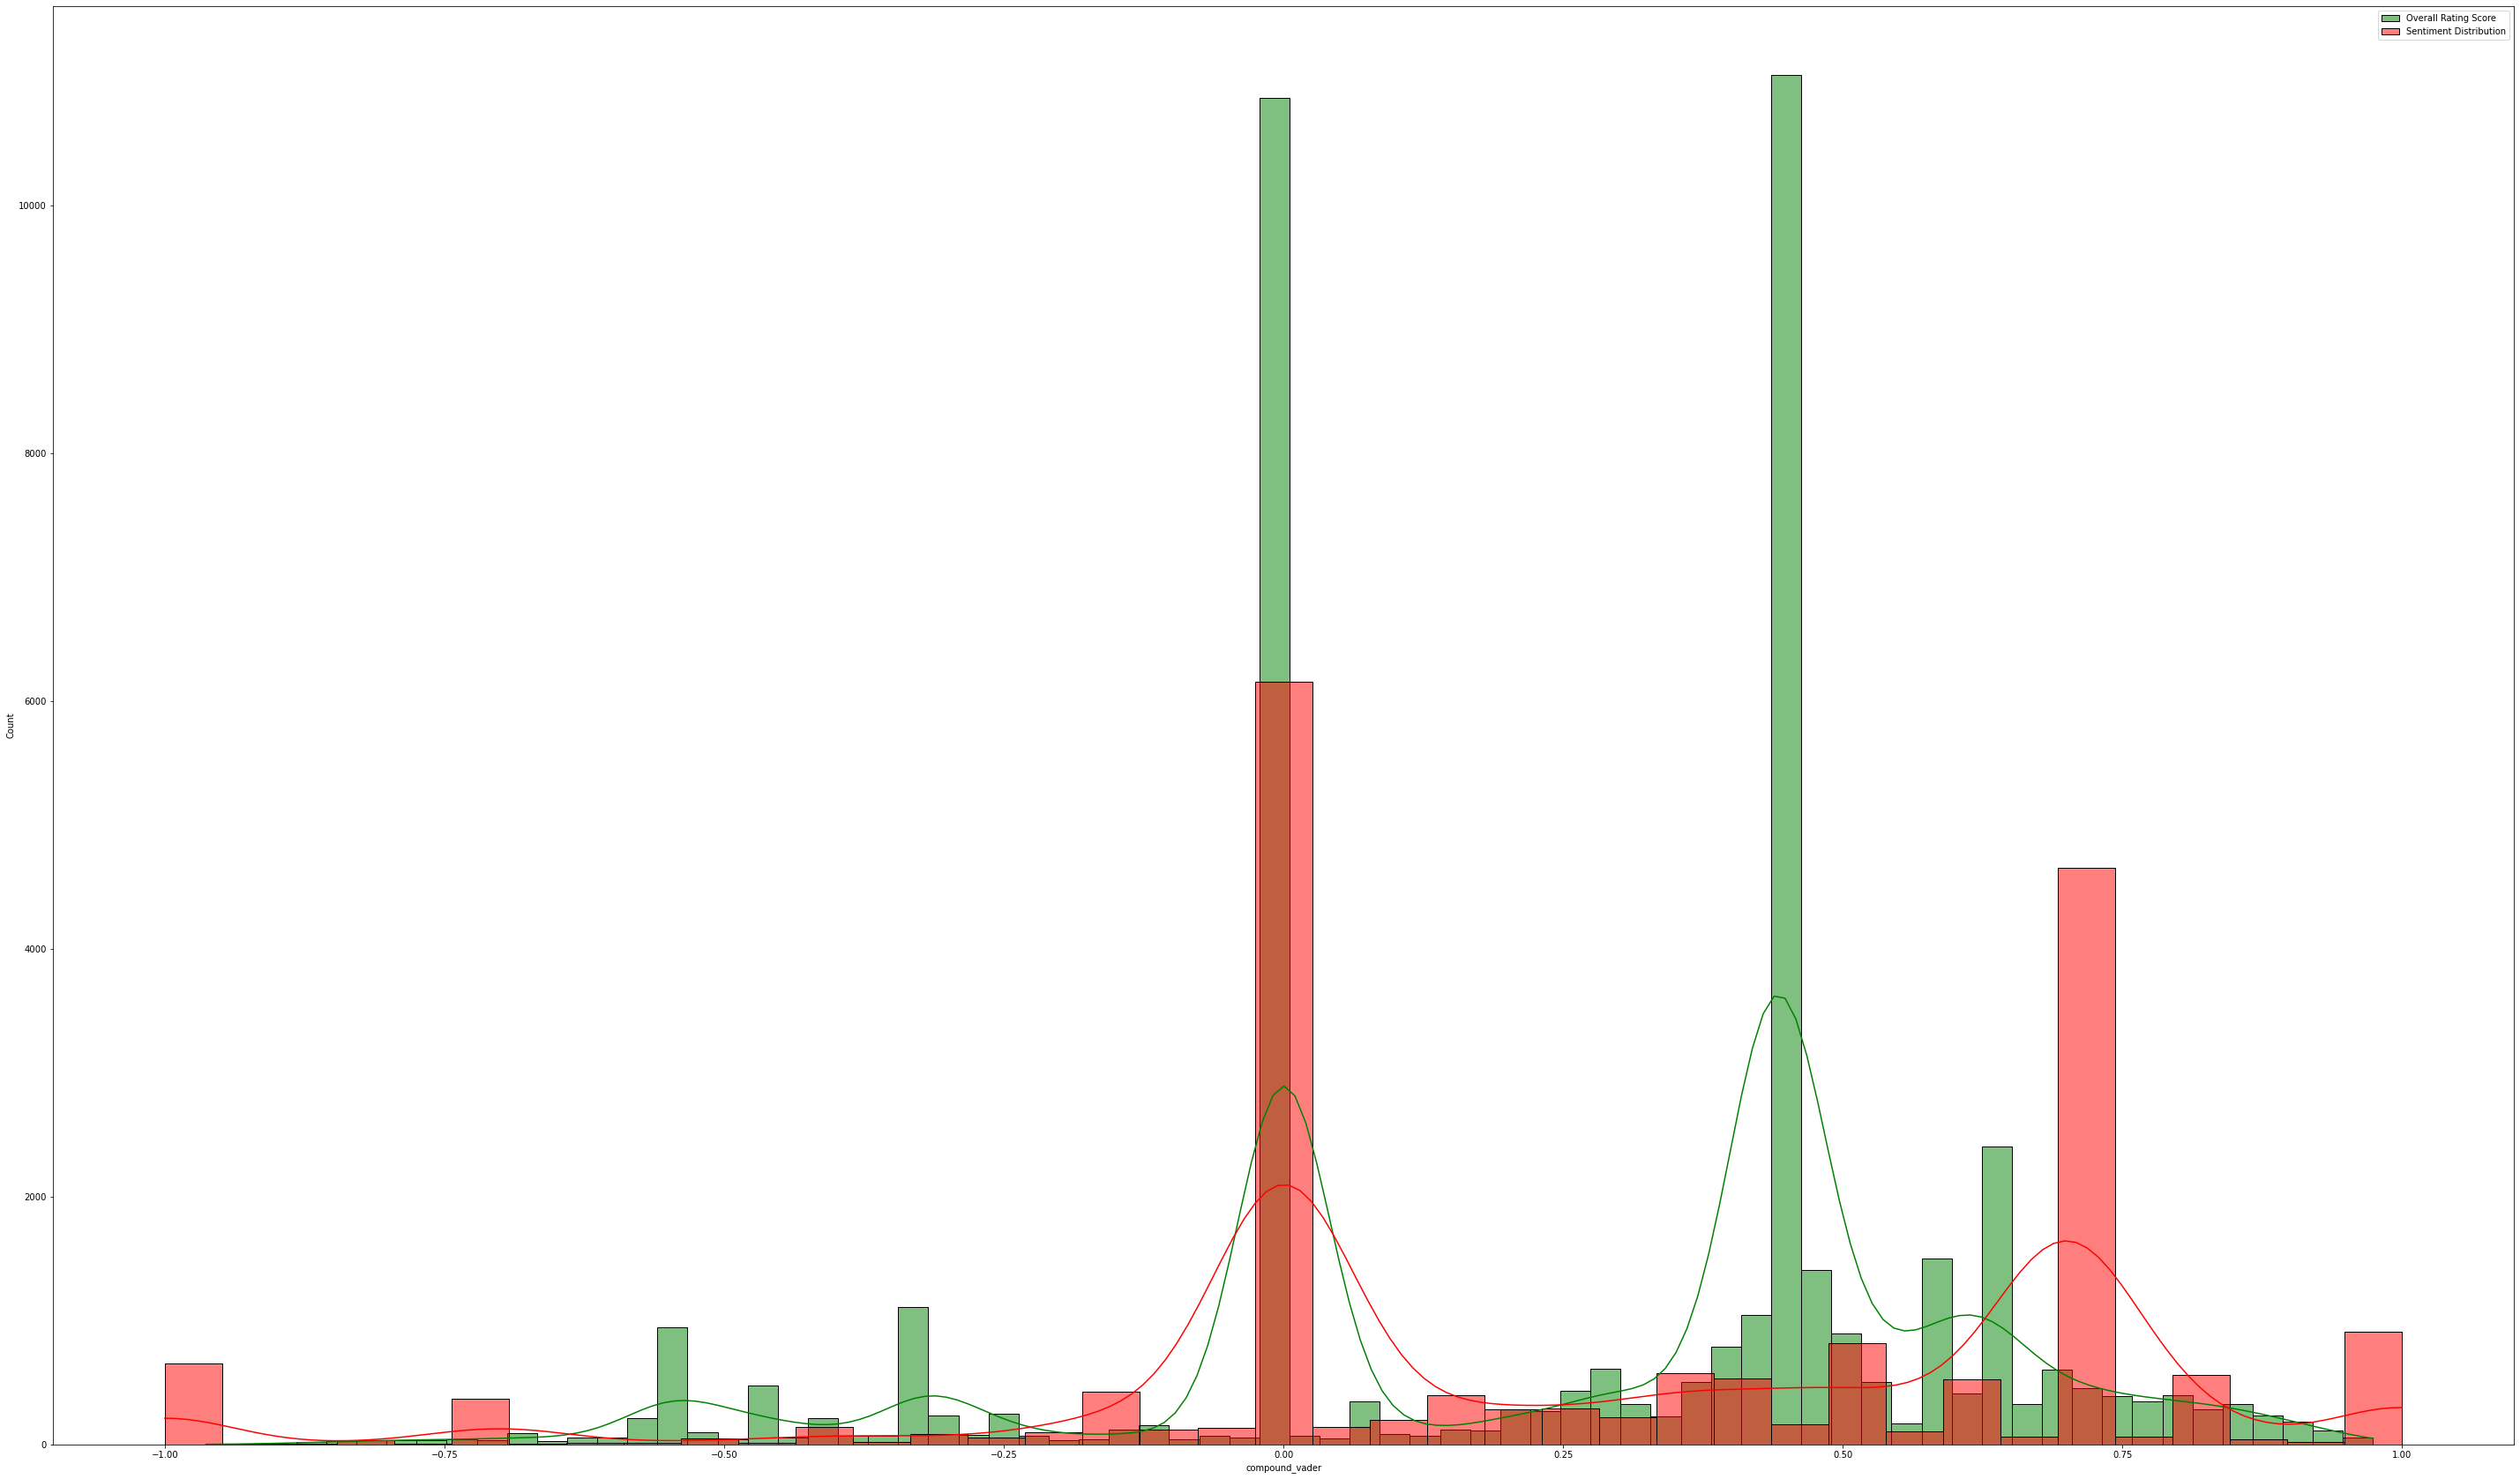

In [147]:
plt.figure(figsize=(50,30))
sns.histplot(data=clean, x="compound_vader", color="green", label="Overall Rating Score", kde=True)
sns.histplot(data=clean, x="polarity_blob", color="red", label="Sentiment Distribution", kde=True)

plt.legend() 
plt.show()

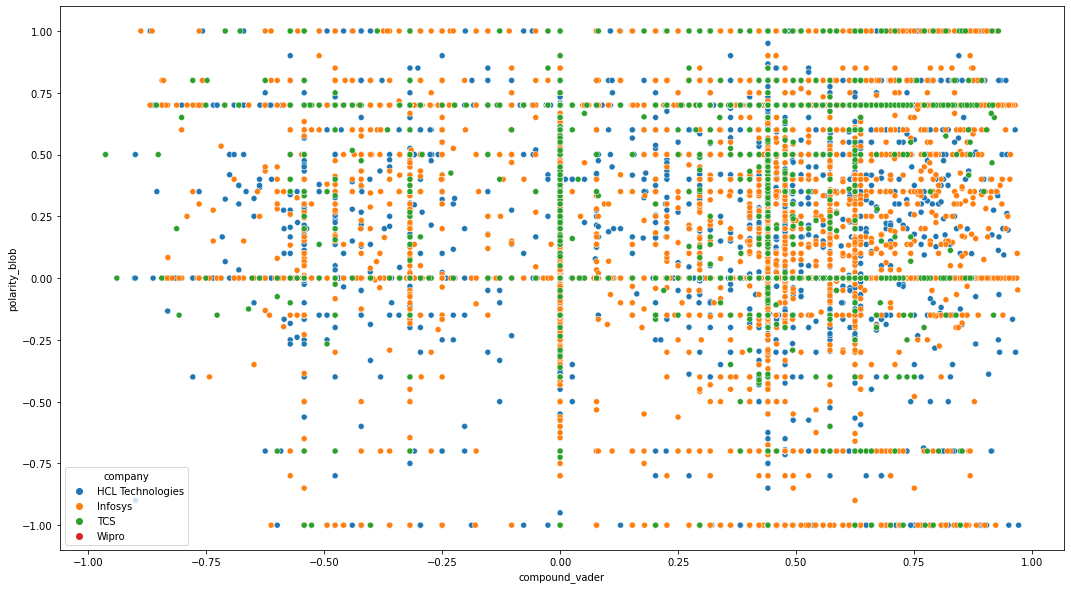

In [148]:
sns.scatterplot(data=clean, x="compound_vader", y="polarity_blob", hue="company")

In [149]:
# Extracting the desired variables for analysis
sentiment = clean.loc[:, ['compound_vader','polarity_blob']]

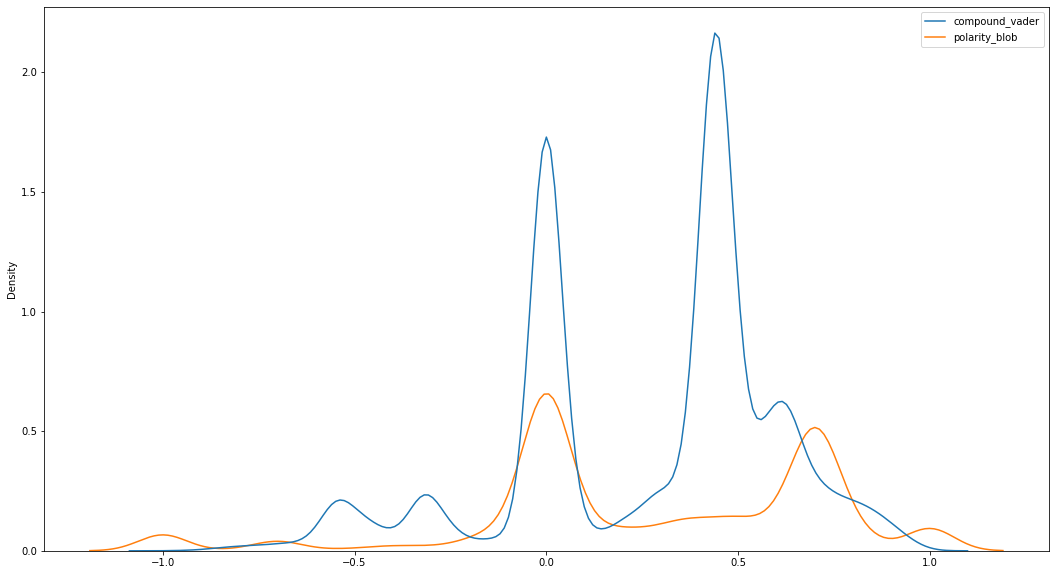

In [150]:
sns.kdeplot(data=sentiment)